In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn
#!pip install sklearn.utils 
!pip install sklearn.ensemble

ERROR: Could not find a version that satisfies the requirement sklearn.ensemble (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble


In [2]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
df = pd.read_csv("G:/Mi unidad/01-Maestria Ciencia de Datos/DMEyF/TPs/dmeyf-2024/datasets/competencia_01_julia.csv")

# Imprimir la cantidad de valores únicos en la columna 'numero_de_cliente'
print(len(df['numero_de_cliente'].unique()))


169481


In [3]:
# Función para contar cuántos registros hay de cada valor único en una columna
def contar_valores_unicos(df, columna):
    # Agrupar por la columna y contar cuántos hay en cada grupo
    conteo = df[columna].value_counts().reset_index()
    conteo.columns = [columna, 'Cantidad']
    
    # Imprimir los resultados
    print(f"Conteo de valores únicos en la columna {columna}:")
    print(conteo)
    
    return conteo

# Función para verificar missing en una columna
def verificar_missing(df, columna, valores):
    # Filtrar filas donde la columna es missing y 'foto_mes' es en los valores
    missing_rows = df[(df[columna].isnull()) & (df['foto_mes'].isin(valores))]
    
    # Mostrar cuántos valores missing hay para esos meses
    print(f"Cantidad de registros con '{columna}' missing para 'foto_mes' en {valores}: {len(missing_rows)}")
    
    return missing_rows

# Función para verificar y reemplazar los missing en una columna
def verificar_y_completar_missing(df, columna, valor_reemplazo):
    # Filtrar filas donde la columna es missing
    missing_rows = df[df[columna].isnull()]
    
    # Mostrar cuántos valores missing hay
    print(f"Cantidad de registros con '{columna}' missing: {len(missing_rows)}")
    
    # Reemplazar los valores missing en la columna por el valor de reemplazo
    df[columna] = df[columna].fillna(valor_reemplazo)
    
    # Verificar que se han reemplazado los valores missing
    print(f"Missing values reemplazados por '{valor_reemplazo}' en la columna '{columna}'.")
    
    return df

# Definir la función Filtrado_baja_2
def filtrado_baja_2(df):
    # Filtrar por 'clase_ternaria' == "BAJA+2"
    df_baja = df[df['clase_ternaria'] == "BAJA+2"]
    
    # Extraer los 'numero_de_cliente' únicos
    clientes_baja = df_baja['numero_de_cliente'].unique()
    
    # Generar un nuevo DataFrame con todos los registros de esos clientes
    df_filtrado = df[df['numero_de_cliente'].isin(clientes_baja)]
    
    # Mostrar la cantidad de clientes con 'BAJA+2'
    print(f"Cantidad de clientes con BAJA+2: {len(clientes_baja)}")
    
    # Mostrar la cantidad de registros finales en el nuevo DataFrame
    print(f"Cantidad de registros finales: {len(df_filtrado)}")
    
    return df_filtrado



In [4]:
# Verificación y preparado
val_unicos = contar_valores_unicos(df, 'clase_ternaria')
missing_rows = verificar_missing(df, 'clase_ternaria', [202105, 202106])
df_completado = verificar_y_completar_missing(df, 'clase_ternaria', " ")

# Filtrado
df_filtrado = filtrado_baja_2(df_completado)

Conteo de valores únicos en la columna clase_ternaria:
  clase_ternaria  Cantidad
0       CONTINUA    645050
1         BAJA+1      4628
2         BAJA+2      3961
Cantidad de registros con 'clase_ternaria' missing para 'foto_mes' en [202105, 202106]: 328307
Cantidad de registros con 'clase_ternaria' missing: 328307
Missing values reemplazados por ' ' en la columna 'clase_ternaria'.
Cantidad de clientes con BAJA+2: 3961
Cantidad de registros finales: 14419


In [5]:
# Filtrar por 'clase_ternaria' == "BAJA+2" y 'cliente_antiguedad' < 12
baja_2_menos_4_meses = df_filtrado[(df_filtrado['clase_ternaria'] == "BAJA+2") & (df_filtrado['cliente_antiguedad'] < 4)]

# Imprimir la cantidad de BAJA+2 con menos de 12 meses de permanencia en el banco
print(f"Cantidad de BAJA+2 con menos de 4 meses de permanencia en el banco: {len(baja_2_menos_4_meses)}")

# Filtrar por 'clase_ternaria' == "BAJA+2" y 'cliente_edad' > 64
baja_2_mas_64_anos = df_filtrado[(df_filtrado['clase_ternaria'] == "BAJA+2") & (df_filtrado['cliente_edad'] > 64)]

# Imprimir la cantidad de BAJA+2 con más de 64 años
print(f"Cantidad de BAJA+2 con más de 64 años: {len(baja_2_mas_64_anos)}")

Cantidad de BAJA+2 con menos de 4 meses de permanencia en el banco: 17
Cantidad de BAJA+2 con más de 64 años: 671


In [6]:
for columna in df_filtrado.columns:
    print(f"{columna}")

numero_de_cliente
foto_mes
active_quarter
cliente_vip
internet
cliente_edad
cliente_antiguedad
mrentabilidad
mrentabilidad_annual
mcomisiones
mactivos_margen
mpasivos_margen
cproductos
tcuentas
ccuenta_corriente
mcuenta_corriente_adicional
mcuenta_corriente
ccaja_ahorro
mcaja_ahorro
mcaja_ahorro_adicional
mcaja_ahorro_dolares
cdescubierto_preacordado
mcuentas_saldo
ctarjeta_debito
ctarjeta_debito_transacciones
mautoservicio
ctarjeta_visa
ctarjeta_visa_transacciones
mtarjeta_visa_consumo
ctarjeta_master
ctarjeta_master_transacciones
mtarjeta_master_consumo
cprestamos_personales
mprestamos_personales
cprestamos_prendarios
mprestamos_prendarios
cprestamos_hipotecarios
mprestamos_hipotecarios
cplazo_fijo
mplazo_fijo_dolares
mplazo_fijo_pesos
cinversion1
minversion1_pesos
minversion1_dolares
cinversion2
minversion2
cseguro_vida
cseguro_auto
cseguro_vivienda
cseguro_accidentes_personales
ccaja_seguridad
cpayroll_trx
mpayroll
mpayroll2
cpayroll2_trx
ccuenta_debitos_automaticos
mcuenta_debitos

In [7]:
# Crear el df_resumen con los atributos propuestos 'numero_de_cliente', 
df_resumen = df_filtrado[['cliente_edad', 'cliente_antiguedad', 'mrentabilidad', 'mrentabilidad_annual',
                           'cproductos', 'tcuentas', 'ccuenta_corriente', 'mtarjeta_visa_consumo', 'mtarjeta_master_consumo',
                           'cprestamos_personales', 'cseguro_vida', 'cseguro_auto', 'cseguro_vivienda',
                           'clase_ternaria']]

# Función para generar variables resumen
def generar_variables_resumen(df_filtrado, df_resumen):
    # Activos totales
    df_resumen.loc[:, 'activos_totales'] = df_filtrado['mactivos_margen'] + df_filtrado['mpasivos_margen']
    
    # Comisiones totales
    df_resumen.loc[:, 'comisiones_totales'] = df_filtrado['mcomisiones_mantenimiento'] + df_filtrado['mcomisiones_otras']
    
    # Transacciones totales
    df_resumen.loc[:, 'transacciones_totales'] = df_filtrado['ctransferencias_recibidas'] + df_filtrado['ctransferencias_emitidas']
    
    # Productos financieros totales
    df_resumen.loc[:, 'productos_financieros_totales'] = df_filtrado['cproductos'] + df_filtrado['tcuentas'] + df_filtrado['ccuenta_corriente']
    
    # Servicios financieros totales
    df_resumen.loc[:, 'servicios_financieros_totales'] = df_filtrado['cseguro_vida'] + df_filtrado['cseguro_auto'] + df_filtrado['cseguro_vivienda']
    
    return df_resumen

# Llamar a la función para generar variables resumen
#df_resumen = generar_variables_resumen(df_filtrado, df_resumen)

g:\Mi unidad\01-Maestria Ciencia de Datos\DMEyF\TPs\dmeyf-2024\dmeyf2024\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


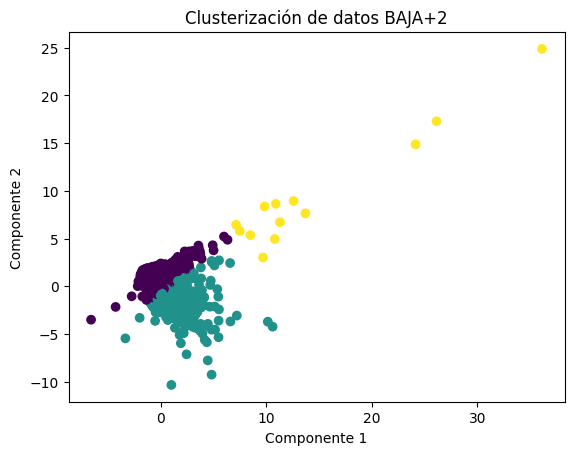

[0.15525438 0.13105337]
[[ 0.25291711  0.28408395  0.5589653   0.5822061   0.2413301  -0.06125701
   0.04556904  0.17276406  0.11419569  0.09532478  0.15389018  0.08156339
   0.23988383]
 [-0.28394411 -0.30804447  0.4152006   0.37449384 -0.45246435  0.00410075
  -0.05823148 -0.32947557 -0.23621425  0.08634124 -0.11497144 -0.1770884
  -0.29551749]]


In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar datos donde clase_ternaria = BAJA+2
df_baja2 = df_resumen[df_resumen['clase_ternaria'] == 'BAJA+2']

# Escalar datos
scaler = StandardScaler()
df_baja2_scaled = scaler.fit_transform(df_baja2.drop('clase_ternaria', axis=1))

# Realizar PCA
pca = PCA(n_components=2)
df_baja2_pca = pca.fit_transform(df_baja2_scaled)

# Realizar K-means
kmeans = KMeans(n_clusters=3)
df_baja2_kmeans = kmeans.fit_predict(df_baja2_pca)

# Crear dataframe con resultados
df_baja2_resultados = pd.DataFrame(df_baja2_pca, columns=['Componente 1', 'Componente 2'])
df_baja2_resultados['Cluster'] = df_baja2_kmeans

# Graficar resultados
plt.scatter(df_baja2_resultados['Componente 1'], df_baja2_resultados['Componente 2'], c=df_baja2_resultados['Cluster'])
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clusterización de datos BAJA+2')
plt.show()

# Mostrar variables más importantes
print(pca.explained_variance_ratio_)
print(pca.components_)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import numpy as np

# Define las características que se utilizarán para buscar clusters
X = df_resumen.drop(['clase_ternaria'], axis=1)

# Crea un objeto Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo con los datos
rf.fit(X, np.zeros(X.shape[0]))

# Utiliza el modelo para obtener las características reducidas
X_reducidas = rf.apply(X)

# Utiliza KMeans para buscar clusters en las características reducidas
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reducidas)

# Imprime las etiquetas de los clusters
print(kmeans.labels_)

g:\Mi unidad\01-Maestria Ciencia de Datos\DMEyF\TPs\dmeyf-2024\dmeyf2024\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 0]


g:\Mi unidad\01-Maestria Ciencia de Datos\DMEyF\TPs\dmeyf-2024\dmeyf2024\.venv\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


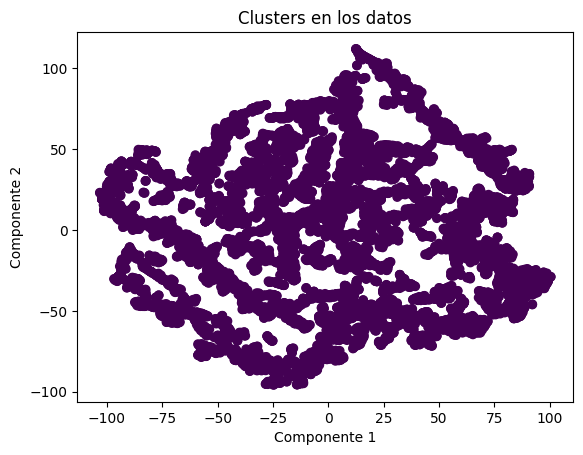

In [10]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce la dimensionalidad de los datos con UMAP
umap = TSNE(n_components=2, random_state=42)
X_umap = umap.fit_transform(X)

# Crea un gráfico con los datos reducidos
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans.labels_)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clusters en los datos')
plt.show()

In [11]:
print(rf.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
